In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from auto_ml_regression.preprocessing import DataPreprocessor

# Пример данных (для регрессии)
# data = fetch_california_housing(as_frame=True)
# df = data.frame
# df["HouseAgeCat"] = pd.cut(df["HouseAge"], bins=3, labels=["new", "medium", "old"])  # Добавим категориальный признак
# df.rename(columns={"MedHouseVal": "target"}, inplace=True)
data = pd.read_csv('../../datasets/insurance_dataset/insurance.csv')
target_col="charges"

# Инициализация и применение препроцессора
preprocessor = DataPreprocessor(
    target_col=target_col,
    cat_encoder_type="target",  # или "target"
    fillna_num_strategy="mean",
    scaler_type="minmax",
    test_size=0.3,
    random_state=42,
)

train_df, test_df = preprocessor.fit_transform(data)

In [2]:
train_df

,age,sex,bmi,children,smoker,region,CAT_sex,CAT_smoker,CAT_region,charges
0,0.934783,0.0,0.408932,0.0,0.0,0.000000,female,no,northwest,13429.03540
1,0.608696,1.0,0.313156,0.0,0.0,0.246445,male,no,southwest,24603.04837
2,0.782609,0.0,0.428840,0.6,0.0,1.000000,female,no,southeast,27322.73386
3,0.804348,1.0,0.396153,0.0,1.0,0.554556,male,yes,northeast,42303.69215
4,0.152174,1.0,0.795803,0.4,1.0,1.000000,male,yes,southeast,42112.23560
...,...,...,...,...,...,...,...,...,...,...
931,0.000000,0.0,0.414044,0.8,0.0,0.554556,female,no,northeast,4561.18850
932,0.456522,0.0,0.212806,1.0,0.0,1.000000,female,no,southeast,8582.30230
933,0.869565,1.0,0.247915,0.0,0.0,0.554556,male,no,northeast,11931.12525
934,0.413043,0.0,0.851224,0.4,1.0,0.246445,female,yes,southwest,46113.51100


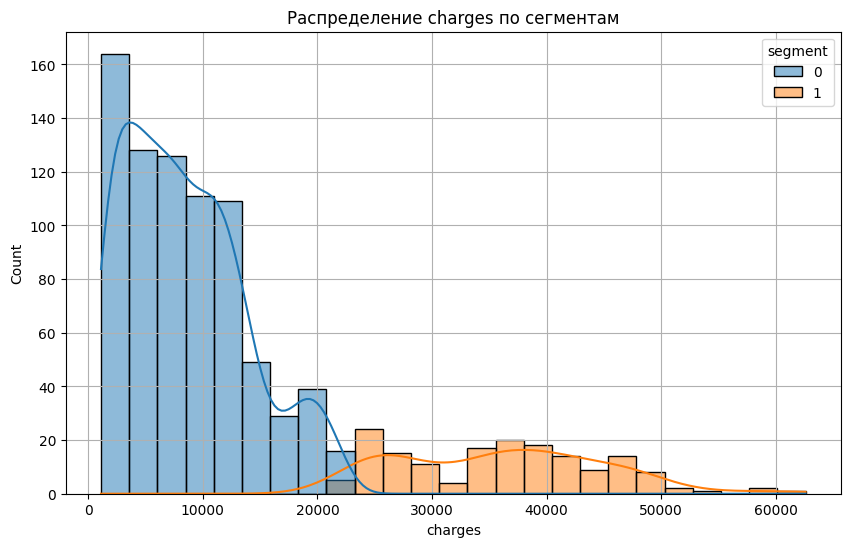

In [3]:
from auto_ml_regression.segmentation.kmeans import KMeansSegmenter

segmenter = KMeansSegmenter(2, plot=True)
segmented_train = segmenter.fit(train_df.copy(), target_col)

In [4]:
segmented_train_0 = segmented_train[segmented_train['segment']==0]
segmented_train_1 = segmented_train[segmented_train['segment']==1]

In [5]:
pd.DataFrame(zip(segmented_train_0[target_col].describe().index, 
                 segmented_train_0[target_col].describe(), 
                 segmented_train_1[target_col].describe()), 
                 columns = ['metric', 'seg_0', 'seg_1'])

,metric,seg_0,seg_1
0,count,771.000000,165.000000
1,mean,8529.376695,36040.859438
2,std,5287.419175,8798.998516
3,min,1121.873900,22395.744240
4,25%,4239.258525,27533.912900
5,50%,7650.773750,36189.101700
6,75%,11837.278675,41999.520000
7,max,22331.566800,62592.873090


In [6]:
segmented_train.segment.value_counts()

segment
0    771
1    165
Name: count, dtype: int64

In [7]:
segmenter.predict(test_df, target_col=target_col)

,age,sex,bmi,children,smoker,region,CAT_sex,CAT_smoker,CAT_region,charges,segment
0,0.586957,0.0,0.247915,0.4,0.0,0.554556,female,no,northeast,9095.06825,0
1,0.391304,0.0,0.378262,0.0,0.0,0.000000,female,no,northwest,5272.17580,0
2,1.000000,0.0,0.293920,0.0,1.0,0.000000,female,yes,northwest,29330.98315,1
3,0.608696,1.0,0.263250,0.6,0.0,0.000000,male,no,northwest,9301.89355,0
4,0.021739,1.0,0.429379,0.0,1.0,0.000000,male,yes,northwest,33750.29180,1
...,...,...,...,...,...,...,...,...,...,...,...
397,0.695652,0.0,0.774415,0.0,0.0,0.554556,female,no,northeast,9541.69555,0
398,0.391304,1.0,0.369653,0.0,0.0,1.000000,male,no,southeast,4399.73100,0
399,0.000000,0.0,0.329701,0.0,0.0,0.554556,female,no,northeast,2200.83085,0
400,0.869565,1.0,0.541297,0.0,0.0,1.000000,male,no,southeast,11363.28320,0


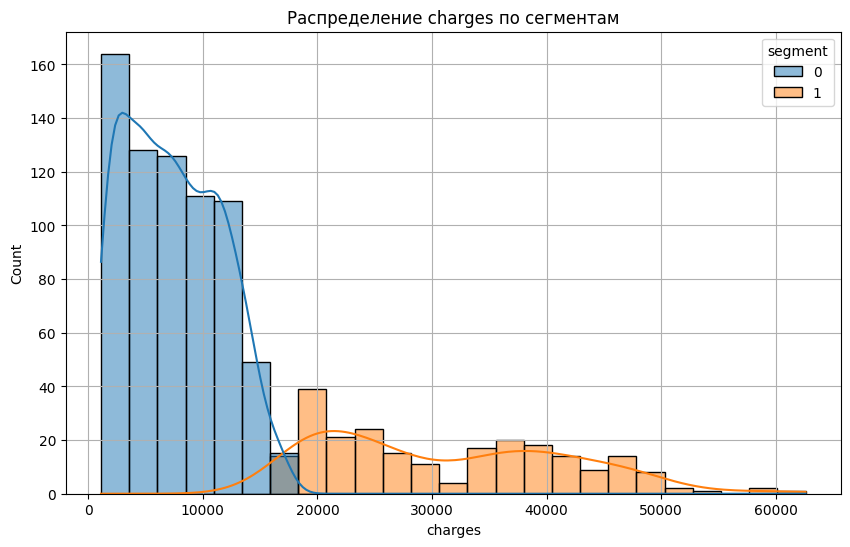

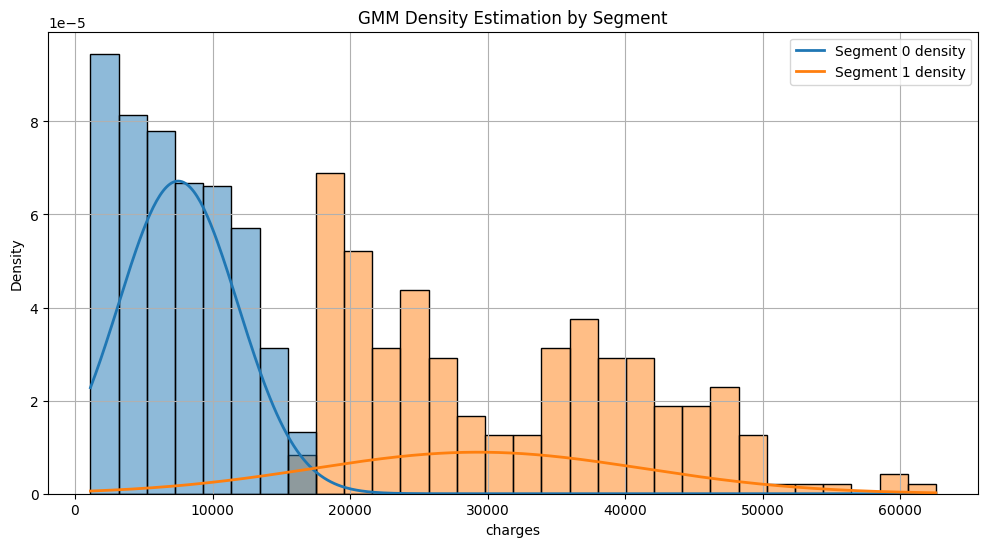

In [8]:
from auto_ml_regression.segmentation.gmm import GaussianMixtureSegmenter

segmenter = GaussianMixtureSegmenter(2, plot=True)
segmented_train = segmenter.fit(train_df.copy(), target_col)

In [11]:
segmented_train_0 = segmented_train[segmented_train['segment']==0]
segmented_train_1 = segmented_train[segmented_train['segment']==1]
pd.DataFrame(zip(segmented_train_0[target_col].describe().index, 
                 segmented_train_0[target_col].describe(), 
                 segmented_train_1[target_col].describe()), 
                 columns = ['metric', 'seg_0', 'seg_1'])

,metric,seg_0,seg_1
0,count,702.000000,234.000000
1,mean,7433.417673,31216.376209
2,std,4134.131488,10532.126385
3,min,1121.873900,17352.680300
4,25%,3928.113625,21345.811525
5,50%,7111.026025,28936.803060
6,75%,10842.414150,39762.610725
7,max,17178.682400,62592.873090


In [6]:
segmenter.predict(test_df, target_col=target_col)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseAgeCat_new,HouseAgeCat_old,target,segment
0,-1.152689,-0.283463,-0.507818,-0.169278,-0.031510,0.061278,0.191664,0.286641,0.0,0.0,0.47700,1
1,-0.706406,0.112947,-0.162520,0.213327,0.120220,-0.035516,-0.239115,0.061963,0.0,0.0,0.45800,1
2,-0.208307,1.857152,-0.595467,0.196308,-0.103428,-0.142154,1.006397,-1.425909,0.0,1.0,5.00001,0
3,0.976831,-0.917719,0.295707,-0.173931,0.243007,0.026283,-0.641799,0.431434,1.0,0.0,2.18600,1
4,-0.079740,0.430075,0.022362,-0.156421,-0.320060,-0.051368,0.453877,-1.171273,0.0,0.0,2.78000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6187,-0.484235,1.460742,-0.506338,-0.172520,-0.742798,-0.056445,0.800373,-1.156295,0.0,1.0,2.37500,1
6188,-1.253538,0.985050,-0.361230,0.045779,-0.380576,0.045441,-0.721399,1.130434,0.0,1.0,0.67300,1
6189,-0.191560,-0.997001,-0.683044,-0.050100,3.145165,-0.060588,-0.927424,0.835856,1.0,0.0,2.18400,1
6190,-0.119113,-1.472694,0.026072,-0.084165,3.952929,0.034614,1.015762,-0.846738,1.0,0.0,1.19400,1


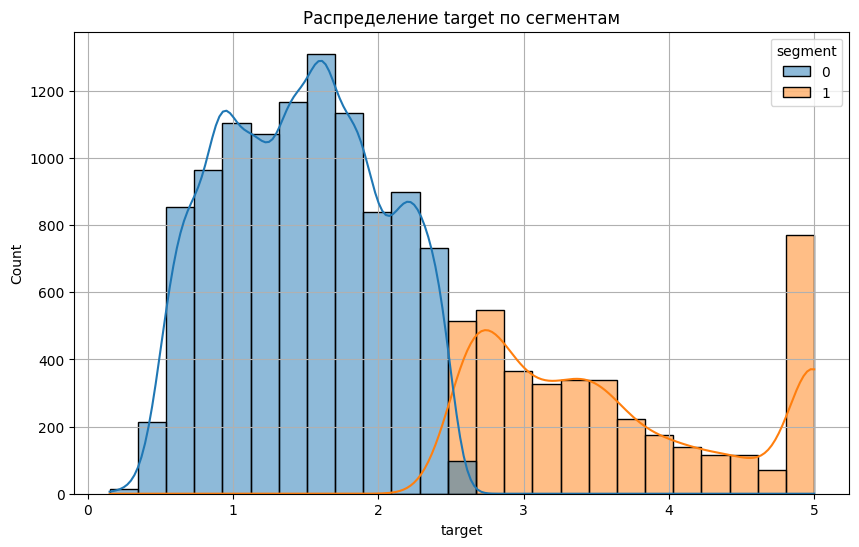

In [3]:
from auto_ml_regression.segmentation.threshold import ThresholdSegmenter
# 1. С фиксированными порогами
target_col="target"
segmenter = ThresholdSegmenter(thresholds=[2.5], plot=True)
segmented_data = segmenter.fit(train_df.copy(), target_col)

In [4]:
segmented_data[segmented_data['target']>2.5]['segment'].value_counts()

segment
1    4046
Name: count, dtype: int64

In [5]:
segmented_data[segmented_data['target']<=2.5]['segment'].value_counts()

segment
0    10402
Name: count, dtype: int64

In [6]:
segmenter.predict(test_df, target_col=target_col)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseAgeCat_new,HouseAgeCat_old,target,segment
0,-1.152689,-0.283463,-0.507818,-0.169278,-0.031510,0.061278,0.191664,0.286641,0.0,0.0,0.47700,0.0
1,-0.706406,0.112947,-0.162520,0.213327,0.120220,-0.035516,-0.239115,0.061963,0.0,0.0,0.45800,0.0
2,-0.208307,1.857152,-0.595467,0.196308,-0.103428,-0.142154,1.006397,-1.425909,0.0,1.0,5.00001,1.0
3,0.976831,-0.917719,0.295707,-0.173931,0.243007,0.026283,-0.641799,0.431434,1.0,0.0,2.18600,0.0
4,-0.079740,0.430075,0.022362,-0.156421,-0.320060,-0.051368,0.453877,-1.171273,0.0,0.0,2.78000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6187,-0.484235,1.460742,-0.506338,-0.172520,-0.742798,-0.056445,0.800373,-1.156295,0.0,1.0,2.37500,0.0
6188,-1.253538,0.985050,-0.361230,0.045779,-0.380576,0.045441,-0.721399,1.130434,0.0,1.0,0.67300,0.0
6189,-0.191560,-0.997001,-0.683044,-0.050100,3.145165,-0.060588,-0.927424,0.835856,1.0,0.0,2.18400,0.0
6190,-0.119113,-1.472694,0.026072,-0.084165,3.952929,0.034614,1.015762,-0.846738,1.0,0.0,1.19400,0.0


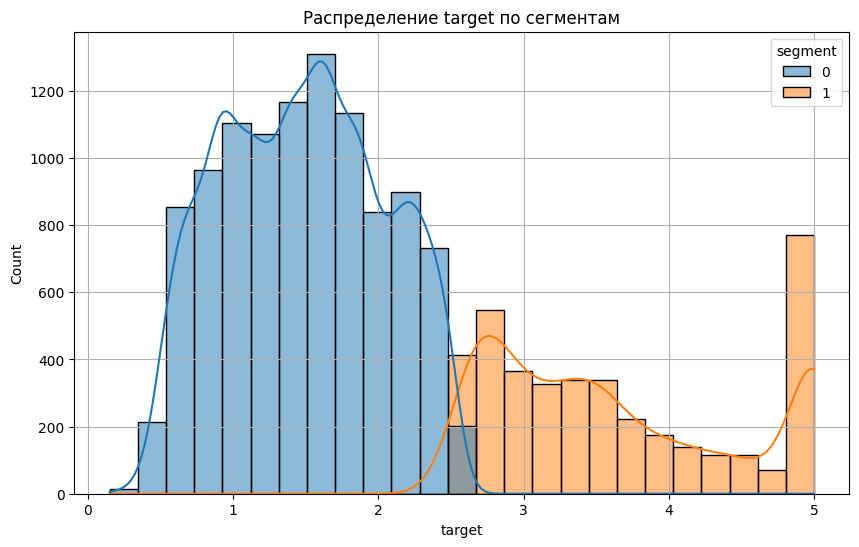

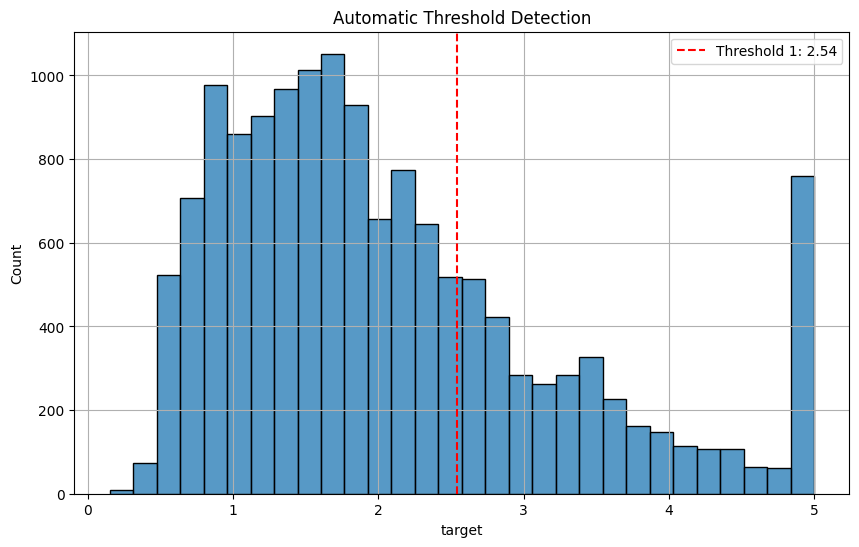

Auto-detected thresholds: [2.537851541673812]


In [7]:
# 2. С автоматическим определением
auto_segmenter = ThresholdSegmenter(n_segments=2, auto_detect=True, plot=True)
auto_segmenter.fit(train_df.copy(), target_col)
print("Auto-detected thresholds:", auto_segmenter.get_thresholds())

In [8]:
auto_segmenter.predict(test_df, target_col=target_col)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseAgeCat_new,HouseAgeCat_old,target,segment
0,-1.152689,-0.283463,-0.507818,-0.169278,-0.031510,0.061278,0.191664,0.286641,0.0,0.0,0.47700,0.0
1,-0.706406,0.112947,-0.162520,0.213327,0.120220,-0.035516,-0.239115,0.061963,0.0,0.0,0.45800,0.0
2,-0.208307,1.857152,-0.595467,0.196308,-0.103428,-0.142154,1.006397,-1.425909,0.0,1.0,5.00001,1.0
3,0.976831,-0.917719,0.295707,-0.173931,0.243007,0.026283,-0.641799,0.431434,1.0,0.0,2.18600,0.0
4,-0.079740,0.430075,0.022362,-0.156421,-0.320060,-0.051368,0.453877,-1.171273,0.0,0.0,2.78000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6187,-0.484235,1.460742,-0.506338,-0.172520,-0.742798,-0.056445,0.800373,-1.156295,0.0,1.0,2.37500,0.0
6188,-1.253538,0.985050,-0.361230,0.045779,-0.380576,0.045441,-0.721399,1.130434,0.0,1.0,0.67300,0.0
6189,-0.191560,-0.997001,-0.683044,-0.050100,3.145165,-0.060588,-0.927424,0.835856,1.0,0.0,2.18400,0.0
6190,-0.119113,-1.472694,0.026072,-0.084165,3.952929,0.034614,1.015762,-0.846738,1.0,0.0,1.19400,0.0
